In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import find_peaks
import copy
import random

# Question 1: Complex calcium oscillations

In [2]:
# Declare parameters
#---------------------------------------
#Total concentrations (micro Moles)
Ca_tot =  90 
Pr_tot = 120

# Geometric Parameters

rho_ER = 0.01
rho_m = 0.01
beta_ER = 0.0025
beta_m = 0.0025

#Kinetics parameters

k_pump = 20 #s^-1
k_ch = 3900 #s^-1
k_leak = 0.05 #s^-1
k_in = 300 #(micro Moles s^-1)
k_out = 125 #s^-1
k_m = 0.00625 #s^-1
k_plus = 0.1 #(micro Moles)
k_minus = 0.01 #s^-1
K1 = 5 #(micro Moles)
K2 = 0.8 #(micro Moles)
K3 = 5 #(micro Moles)

#Initial concentrations (micro Moles)

Ca_cyt_0 = 0.3 
Ca_ER_0 = 0.2 
Ca_m_0 = 1 

In [3]:
def Ca_system(y, t, k_ch=3900):
    Ca_cyt, Ca_ER, Ca_m = y
    J_pump = k_pump*Ca_cyt
    J_ch = k_ch*((Ca_cyt**2)/(K1**2 + Ca_cyt**2))*(Ca_ER - Ca_cyt)
    J_leak = k_leak*(Ca_ER - Ca_cyt)
    J_in = k_in*(Ca_cyt**8)/(K2**8 + Ca_cyt**8)
    J_out = Ca_m*(((k_out*Ca_cyt**2) / (K3**2 + Ca_cyt**2))+k_m)
    CaPr = Ca_tot - Ca_cyt -(rho_ER/beta_ER)*Ca_ER - (rho_m/beta_m)*Ca_m
    Pr = Pr_tot - CaPr
    
    return [J_ch + J_leak - J_pump + J_out - J_in + k_minus*CaPr - k_plus*Ca_cyt*Pr, 
           (beta_ER/rho_ER)*(J_pump - J_ch - J_leak), (beta_m/rho_m)*(J_in - J_out)]

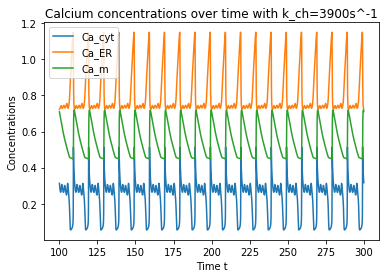

In [4]:
# e

t = np.linspace(0,300,9000)
sol = odeint(Ca_system, [Ca_cyt_0,Ca_ER_0,Ca_m_0], t, args=(3900,))[3000:]

plt.title('Calcium concentrations over time with k_ch=3900s^-1')
plt.plot(t[3000:], sol[:,0], label='Ca_cyt')
plt.plot(t[3000:], sol[:,1], label='Ca_ER')
plt.plot(t[3000:], sol[:,2], label='Ca_m')
plt.xlabel('Time t')
plt.ylabel('Concentrations')
plt.legend()
plt.show()

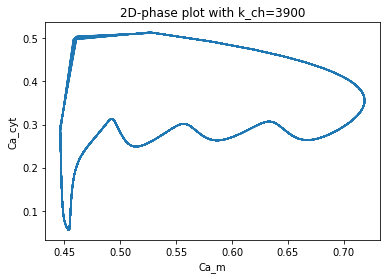

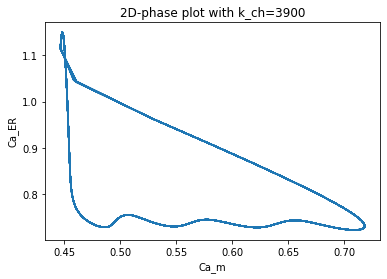

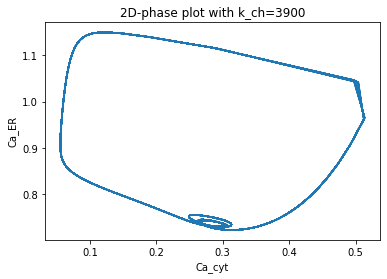

In [5]:
# h

plt.title('2D-phase plot with k_ch=3900')
plt.plot(sol[:,2], sol[:,0])
plt.xlabel('Ca_m')
plt.ylabel('Ca_cyt')
plt.show()

plt.title('2D-phase plot with k_ch=3900')
plt.plot(sol[:,2], sol[:,1])
plt.xlabel('Ca_m')
plt.ylabel('Ca_ER')
plt.show()

plt.title('2D-phase plot with k_ch=3900')
plt.plot(sol[:,0], sol[:,1])
plt.xlabel('Ca_cyt')
plt.ylabel('Ca_ER')
plt.show()

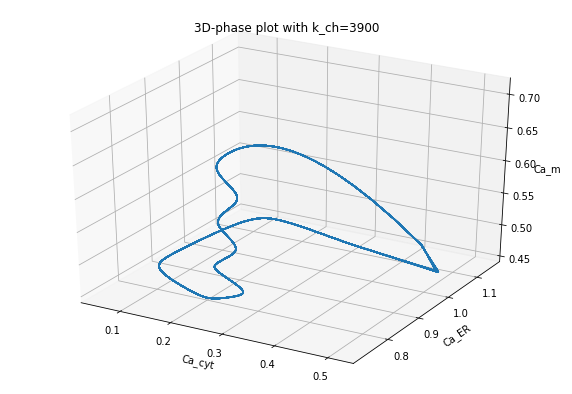

In [6]:
# i

fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D-phase plot with k_ch=3900')
ax.plot(sol[:,0], sol[:,1], sol[:,2])
ax.set_xlabel('Ca_cyt')
ax.set_ylabel('Ca_ER')
ax.set_zlabel('Ca_m')
plt.show()

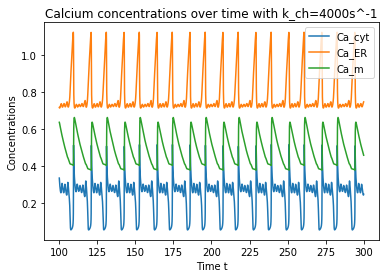

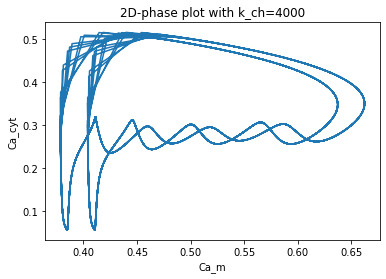

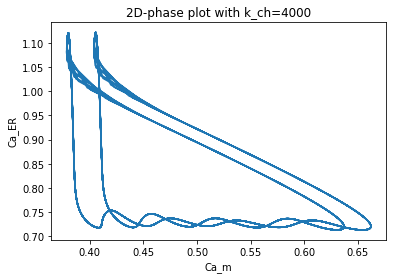

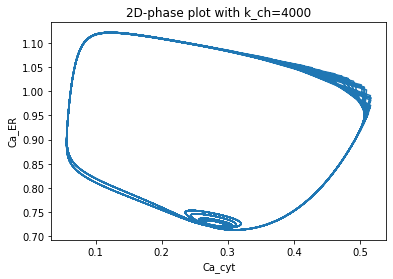

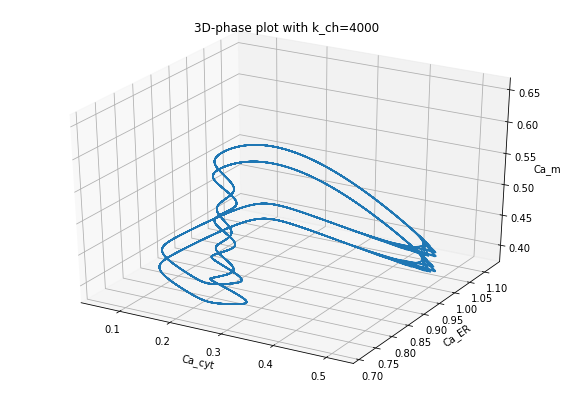

In [7]:
# j (k_ch=4000)

t = np.linspace(0,300,9000)
sol = odeint(Ca_system, [Ca_cyt_0,Ca_ER_0,Ca_m_0], t, args=(4000,))[3000:]
plt.title('Calcium concentrations over time with k_ch=4000s^-1')
plt.plot(t[3000:], sol[:,0], label='Ca_cyt')
plt.plot(t[3000:], sol[:,1], label='Ca_ER')
plt.plot(t[3000:], sol[:,2], label='Ca_m')
plt.xlabel('Time t')
plt.ylabel('Concentrations')
plt.legend()
plt.show()

plt.title('2D-phase plot with k_ch=4000')
plt.plot(sol[:,2], sol[:,0])
plt.xlabel('Ca_m')
plt.ylabel('Ca_cyt')
plt.show()
plt.title('2D-phase plot with k_ch=4000')
plt.plot(sol[:,2], sol[:,1])
plt.xlabel('Ca_m')
plt.ylabel('Ca_ER')
plt.show()
plt.title('2D-phase plot with k_ch=4000')
plt.plot(sol[:,0], sol[:,1])
plt.xlabel('Ca_cyt')
plt.ylabel('Ca_ER')
plt.show()

fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D-phase plot with k_ch=4000')
ax.plot(sol[:,0], sol[:,1], sol[:,2])
ax.set_xlabel('Ca_cyt')
ax.set_ylabel('Ca_ER')
ax.set_zlabel('Ca_m')
plt.show()

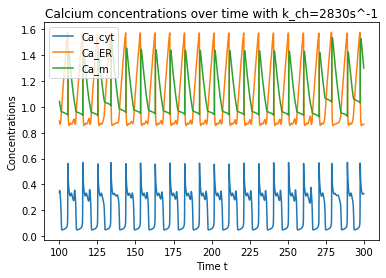

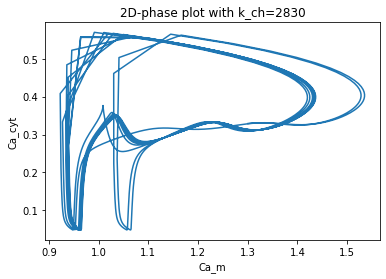

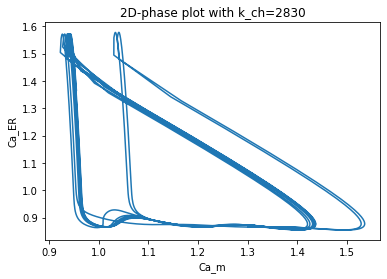

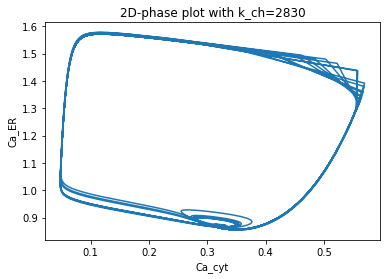

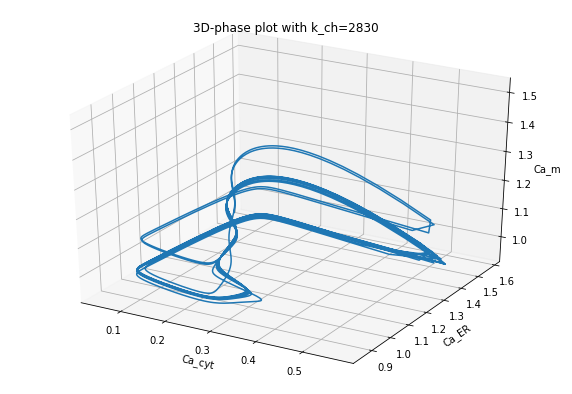

In [8]:
# k (k_ch=2830)

t = np.linspace(0,300,9000)
sol = odeint(Ca_system, [Ca_cyt_0,Ca_ER_0,Ca_m_0], t, args=(2830,))[3000:]
plt.title('Calcium concentrations over time with k_ch=2830s^-1')
plt.plot(t[3000:], sol[:,0], label='Ca_cyt')
plt.plot(t[3000:], sol[:,1], label='Ca_ER')
plt.plot(t[3000:], sol[:,2], label='Ca_m')
plt.xlabel('Time t')
plt.ylabel('Concentrations')
plt.legend()
plt.show()
sol = sol[3000:9000]

plt.title('2D-phase plot with k_ch=2830')
plt.plot(sol[:,2], sol[:,0])
plt.xlabel('Ca_m')
plt.ylabel('Ca_cyt')
plt.show()
plt.title('2D-phase plot with k_ch=2830')
plt.plot(sol[:,2], sol[:,1])
plt.xlabel('Ca_m')
plt.ylabel('Ca_ER')
plt.show()
plt.title('2D-phase plot with k_ch=2830')
plt.plot(sol[:,0], sol[:,1])
plt.xlabel('Ca_cyt')
plt.ylabel('Ca_ER')
plt.show()

fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D-phase plot with k_ch=2830')
ax.plot(sol[:,0], sol[:,1], sol[:,2])
ax.set_xlabel('Ca_cyt')
ax.set_ylabel('Ca_ER')
ax.set_zlabel('Ca_m')
plt.show()

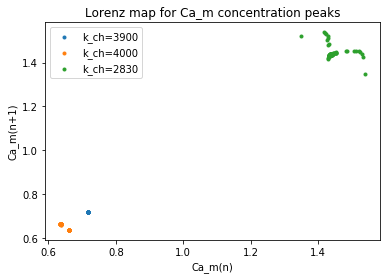

In [9]:
# l

t = np.linspace(0, 1000, 5000)
Ca_m_3900 = odeint(Ca_system, [Ca_cyt_0,Ca_ER_0,Ca_m_0], t, args=(3900,))[500:,2]
Ca_m_4000 = odeint(Ca_system, [Ca_cyt_0,Ca_ER_0,Ca_m_0], t, args=(4000,))[500:,2]
Ca_m_2830 = odeint(Ca_system, [Ca_cyt_0,Ca_ER_0,Ca_m_0], t, args=(2830,))[500:,2]
peaks_3900, _ = find_peaks(Ca_m_3900)
peaks_4000, _ = find_peaks(Ca_m_4000)
peaks_2830, _ = find_peaks(Ca_m_2830)

plt.title('Lorenz map for Ca_m concentration peaks')
plt.scatter(Ca_m_3900[peaks_3900[:-1]], Ca_m_3900[peaks_3900[1:]], marker='.', label='k_ch=3900')
plt.scatter(Ca_m_4000[peaks_4000[:-1]], Ca_m_4000[peaks_4000[1:]], marker='.', label='k_ch=4000')
plt.scatter(Ca_m_2830[peaks_2830[:-1]], Ca_m_2830[peaks_2830[1:]], marker='.', label='k_ch=2830')
plt.xlabel('Ca_m(n)')
plt.ylabel('Ca_m(n+1)')
plt.legend()
plt.show()

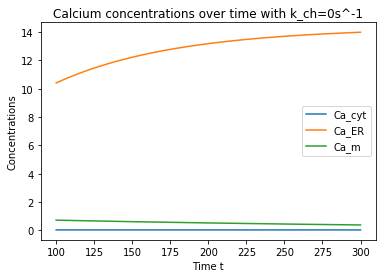

In [10]:
t = np.linspace(0,300,9000)
sol = odeint(Ca_system, [Ca_cyt_0,Ca_ER_0,Ca_m_0], t, args=(0,))[3000:]
plt.title('Calcium concentrations over time with k_ch=0s^-1')
plt.plot(t[3000:], sol[:,0], label='Ca_cyt')
plt.plot(t[3000:], sol[:,1], label='Ca_ER')
plt.plot(t[3000:], sol[:,2], label='Ca_m')
plt.xlabel('Time t')
plt.ylabel('Concentrations')
plt.legend()
plt.show()

# Question 2: Schnakenberg model

In [11]:
# c

def laplace_1D(X, dx):
    Xleft = X[:-2]
    Xright = X[2:]
    a=(Xleft + Xright - 2*X[1:-1])/dx**2    
    return np.pad(a, (1, 1), 'wrap')

def f(u, v, c_1=0.1, c_minus_1=1, c_3=1,):
    return c_1 - c_minus_1*u + c_3*(u**2)*v

def g(u, v, c_2=0.9, c_3=1):
    return c_2 - c_3*(u**2)*v

def dudt_1D(u, v, D_u=0.0004, L=1, N=100):
    return D_u*laplace_1D(u, L/N) + f(u, v)

def dvdt_1D(u, v, D_v=0.016, L=1, N=100):
    return D_v*laplace_1D(v, L/N) + g(u, v)

def new_u_v_1D(u_t, v_t, dt):
    u_t_dt = u_t + dt*dudt_1D(u, v)
    v_t_dt = v_t + dt*dvdt_1D(u, v)
    return u_t_dt, v_t_dt

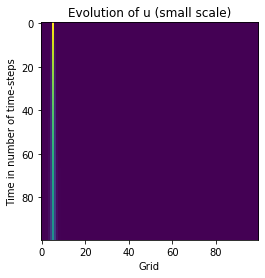

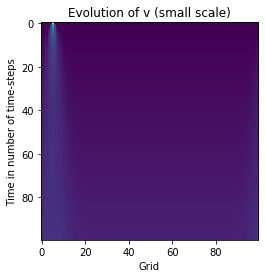

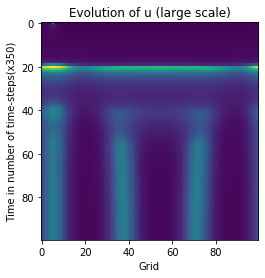

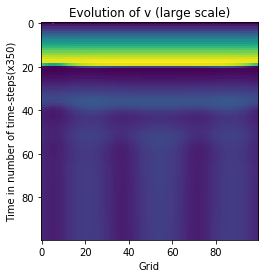

In [12]:
# d

u = np.zeros(100)
v = np.zeros(100)
u[5] = 3
v[5] = 1
us_small, us_large = [], []
vs_small, vs_large = [], []

dt = .001
T = np.arange(0, 35, dt)
for i, t in enumerate(T):
    u, v = new_u_v_1D(u, v, dt)
    # evolution in the beginning
    if i<100:
        us_small.append(u)
        vs_small.append(v)
    # evolution on larger scale
    if i%350 == 0:
        us_large.append(u)
        vs_large.append(v)

plt.title('Evolution of u (small scale)')
plt.imshow(us_small)
plt.xlabel('Grid')
plt.ylabel('Time in number of time-steps')
plt.savefig('Evolution of u (small scale).png')
plt.show()

plt.title('Evolution of v (small scale)')
plt.imshow(vs_small)
plt.xlabel('Grid')
plt.ylabel('Time in number of time-steps')
plt.savefig('Evolution of v (small scale).png')
plt.show()

plt.title('Evolution of u (large scale)')
plt.imshow(us_large)
plt.xlabel('Grid')
plt.ylabel('Time in number of time-steps(x350)')
plt.savefig('Evolution of u (large scale).png')
plt.show()

plt.title('Evolution of v (large scale)')
plt.imshow(vs_large)
plt.xlabel('Grid')
plt.ylabel('Time in number of time-steps(x350)')
plt.savefig('Evolution of v (large scale).png')
plt.show()

In [13]:
# f

def laplace_2D(X, dx):
    Xtop = X[:-2, 1:-1]
    Xbottom = X[2:, 1:-1]
    Xleft = X[1:-1, :-2]
    Xright = X[1:-1, 2:]
    a = (Xtop + Xbottom + Xleft + Xright - 4*X[1:-1, 1:-1])/(dx**2)
    return np.pad(a, ((1, 1), (1, 1)), 'wrap')

def dudt_2D(u, v, D_u=0.0004, L=1, N=100):
    return D_u*laplace_2D(u, L/N) + f(u, v)

def dvdt_2D(u, v, D_v=0.016, L=1, N=100):
    return D_v*laplace_2D(v, L/N) + g(u, v)

def new_u_v_2D(u_t, v_t, dt):
    u_t_dt = u_t + dt*dudt_2D(u, v)
    v_t_dt = v_t + dt*dvdt_2D(u, v)
    return u_t_dt, v_t_dt

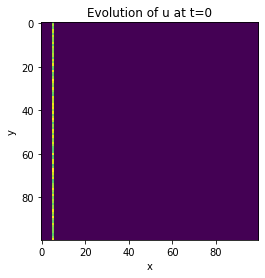

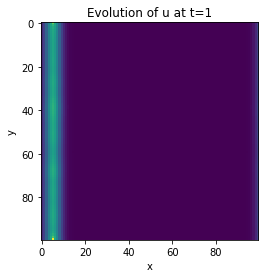

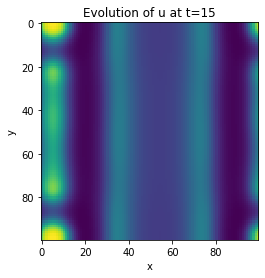

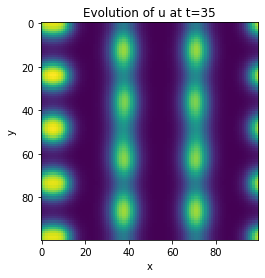

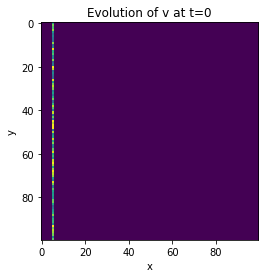

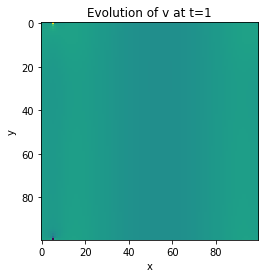

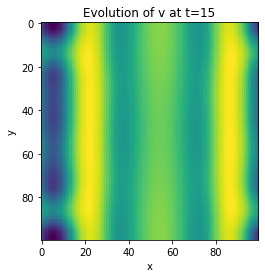

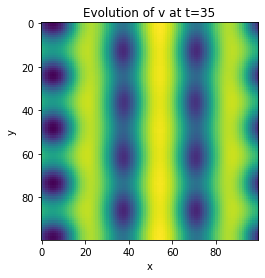

In [14]:
# g

u = np.zeros((100,100))
v = np.zeros((100,100))
for i in range(0,100):
    v[i,5] = random.uniform(2.5,3.5)
    u[i,5] = random.uniform(0.5,1.5)
us = []
vs = []

dt = .001
T = np.arange(0, 35, dt)
for i, t in enumerate(T):
    u, v = new_u_v_2D(u, v, dt)
    us.append(u)
    vs.append(v)

#u grid
plt.title('Evolution of u at t=0')
plt.imshow(us[0])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.title('Evolution of u at t=1')
plt.imshow(us[1000])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.title('Evolution of u at t=15')
plt.imshow(us[15000])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.title('Evolution of u at t=35')
plt.imshow(us[34999])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#v grid
plt.title('Evolution of v at t=0')
plt.imshow(vs[0])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.title('Evolution of v at t=1')
plt.imshow(vs[1000])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.title('Evolution of v at t=15')
plt.imshow(vs[15000])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.title('Evolution of v at t=35')
plt.imshow(vs[34999])
plt.xlabel('x')
plt.ylabel('y')
plt.show()